# Hypothesis testing problem

### **Exercise 1**

#### ANOVA

Suppose that a study wants to check if there is a significant difference between the goal averages of soccer players depending on the position in which they play. In case there is a difference, you want to know which positions differ from the rest.

NOTE: You must replace the values <<<FIXME>>>.

**Exercise: Load data from "datos_laliga.csv". It contains a sample of randomly selected players.**

In [10]:
import pandas as pd
Team_soccer = pd.read_csv('assets/datos_laliga.csv')
Team_soccer

,id_player,position,average
0,id_189,DC,0.310
1,id_85,DC,0.306
2,id_105,DC,0.320
3,id_34,DC,0.329
4,id_32,DC,0.369
...,...,...,...
322,id_231,DC,0.381
323,id_20,MP,0.310
324,id_294,DC,0.340
325,id_218,DC,0.305


In [11]:
Team_soccer.describe()

,average
count,327.000000
mean,0.332159
std,0.035702
min,0.174000
25%,0.309000
50%,0.331000
75%,0.354500
max,0.437000


**Exercise: Identify the number of groups and number of observations per group to determine if it is a balanced model. The mean and standard deviation of the group are also calculated.**

In [12]:
pd.DataFrame(Team_soccer)

,id_player,position,average
0,id_189,DC,0.310
1,id_85,DC,0.306
2,id_105,DC,0.320
3,id_34,DC,0.329
4,id_32,DC,0.369
...,...,...,...
322,id_231,DC,0.381
323,id_20,MP,0.310
324,id_294,DC,0.340
325,id_218,DC,0.305


In [13]:
pd.crosstab(Team_soccer['average'],Team_soccer["position"])
#DC: Delantero centro
#MO: Medio ofensivo
#MP: Media punta
#P: Puntero

position,DC,MO,MP,P
average,,,,
0.174,1,0,0,0
0.219,0,0,0,1
0.230,0,0,0,1
0.240,1,0,0,0
0.254,0,0,0,1
...,...,...,...,...
0.412,0,1,0,0
0.414,1,0,0,0
0.420,1,0,0,0


**Exercise: Calculate the mean and standar deviation by position**

In [14]:
Team_soccer.groupby('position')['average'].agg('mean')

position
DC    0.331526
MO    0.347786
MP    0.334250
P     0.322615
Name: average, dtype: float64

**Exercise: Calculate the standard deviation by position**

In [15]:

Team_soccer.groupby('position')['average'].agg('std')

position
DC    0.037095
MO    0.036037
MP    0.029444
P     0.045132
Name: average, dtype: float64

Since the number of observations per group is not constant, it is an unbalanced model. It is important to take this into account when checking the conditions of normality and homoscedasticity (s1 = s2 = s3 = s4). The most useful graphical representation before performing an ANOVA is the Box-Plot model.

**Exercise: Plot a boxplot for each position**

In [16]:
import numpy as np 
import pandas as pd
from plotnine import *

ModuleNotFoundError: No module named 'plotnine'

Note: you may need to restart the kernel to use updated packages.


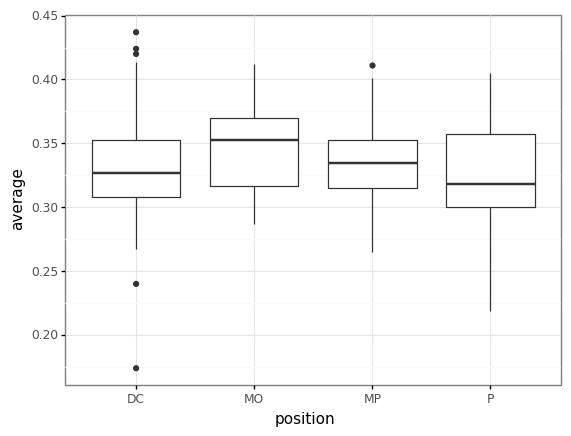

<ggplot: (8791661586041)>

In [ ]:
# Boxplots
# This is another way and popular package used in R (ggplot)
#from plotnine import ggplot, aes, geom_boxplot
%pip install plotnine
import matplotlib.pylab as plt
plt.style.use('ggplot')

(ggplot(Team_soccer, aes(x="position", y="average")) + geom_boxplot() + theme_bw())


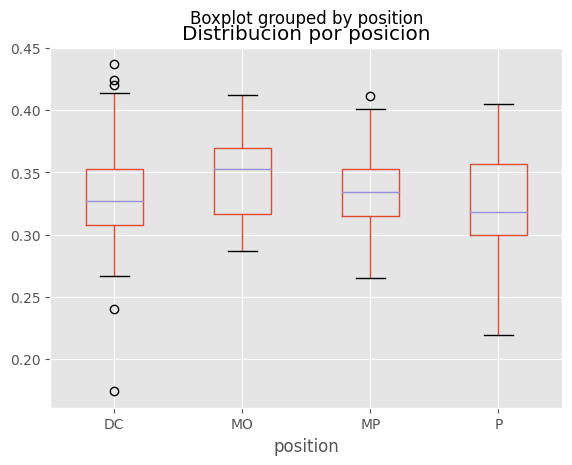

In [ ]:
Team_soccer.boxplot(column='average', by='position' )
plt.title('Distribucion por posicion')
plt.show()

Note: you may need to restart the kernel to use updated packages.


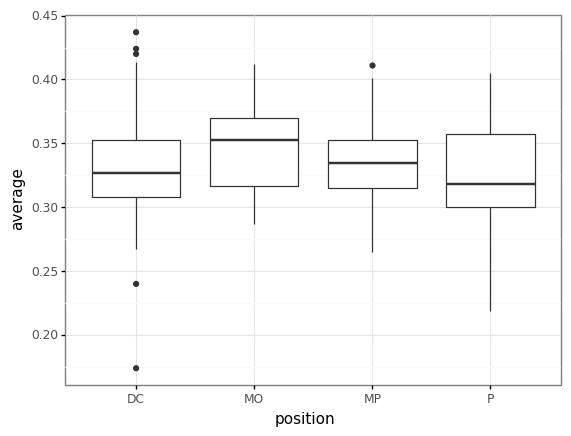

<ggplot: (8791660962139)>

In [ ]:
%pip install plotnine
from plotnine import ggplot, aes, geom_boxplot

(
    ggplot(Team_soccer)  # What data to use
    + aes(x="position", y="average")  # What variable to use
    + geom_boxplot()  # Geometric object to use for drawing
    + theme_bw()
)


#### Independence

The total sample size is <10% of the population of all players in the league. The groups (categorical variable) are independent of each other since a random sample of players from the entire league (not just from the same team) has been made.

Normal distribution of observations: The quantitative variable must be distributed in a normal way in each of the groups. The normality study can be done graphically (qqplot) or with a hypothesis test.

**Exercise: Make an analysis about normal distribution for each position**

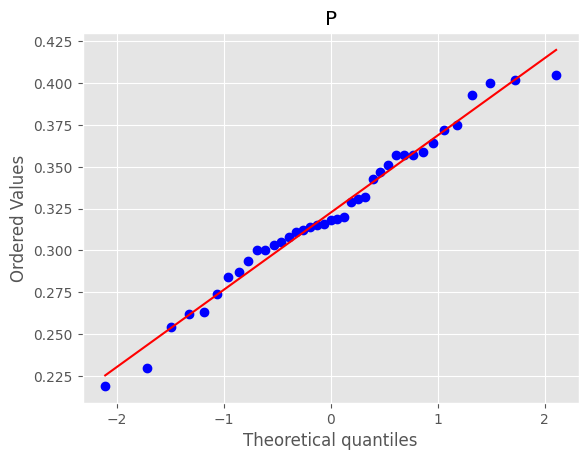

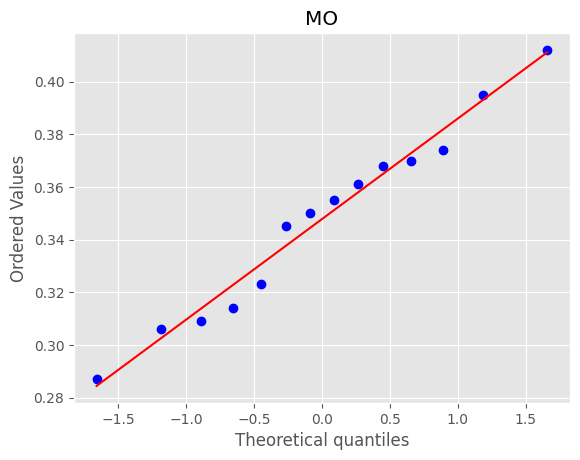

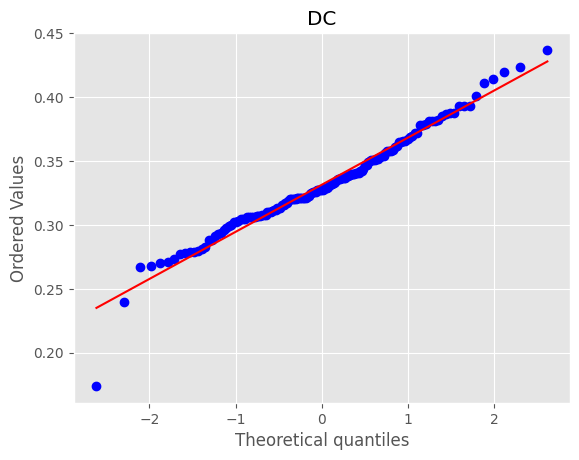

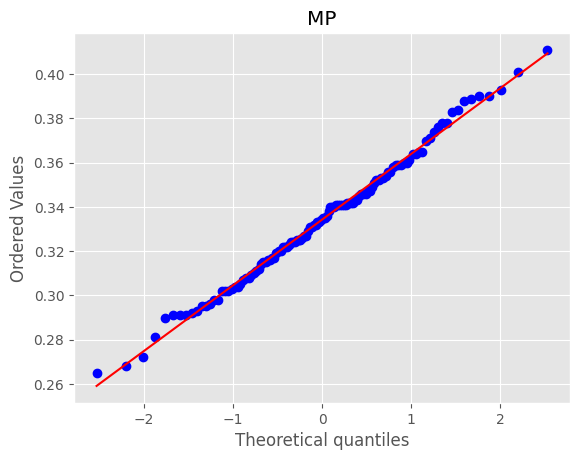

In [ ]:
import numpy as np 
import pylab 
import matplotlib.pyplot as plt
import scipy.stats as stats

measurements = Team_soccer.loc[Team_soccer["position"] == "P","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("P")
plt.show()

measurements = Team_soccer.loc[Team_soccer["position"] == "MO","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("MO")
plt.show()

measurements = Team_soccer.loc[Team_soccer["position"] == "DC","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("DC")
plt.show()

measurements = Team_soccer.loc[Team_soccer["position"] == "MP","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("MP")
plt.show()

**Exercise: make the boxplot for each position, what you can say about them?**

In [ ]:
# Using plotly
%pip install plotly
import plotly.graph_objects as go 

fig= go.Figure()
fig.add_trace(go.Box(y=Team_soccer.loc[Team_soccer["position"] == "P","average"]))
fig.add_trace(go.Box(y=Team_soccer.loc[Team_soccer["position"] == "DC","average"]))
fig.add_trace(go.Box(y=Team_soccer.loc[Team_soccer["position"] == "MO","average"]))
fig.add_trace(go.Box(y=Team_soccer.loc[Team_soccer["position"] == "MP","average"]))
fig.show()



Note: you may need to restart the kernel to use updated packages.


**Exercise: Use the Kolmogorov-Smirnov test or with or without the Lilliefors correction in order to know the normality distribution.**

In [ ]:
# Beginner way to do it
%pip install statsmodels
from statsmodels.stats.diagnostic import lilliefors

my_Ts = pd.DataFrame(index=np.arange(len(np.unique(Team_soccer["position"]))), columns=["position", "D_statistic", "p_value"])
my_Ts["position"] = np.unique(Team_soccer["position"])

for position in my_Ts["position"]:
    my_data_subset = Team_soccer.loc[Team_soccer["position"] == position,:]
    D_statistic, p_value = lilliefors(my_data_subset.average)
    my_Ts.loc[my_Ts["position"]==position,["D_statistic", "p_value"]] = D_statistic, p_value
    
print(my_Ts)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 104.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 78.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
  position D_statistic   p_value
0       DC    0.070653  0.084495
1       MO    0.112049  0.903567
2       MP    0.044082  0.855077
3        P    0.087208  0.634941


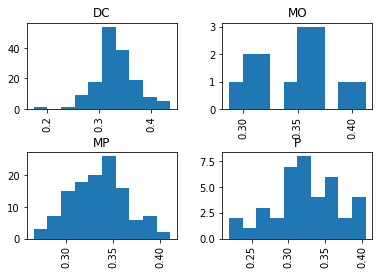

In [ ]:
import matplotlib.pyplot as plt
Team_soccer.hist(column='average', by='position')
plt.show()

In [ ]:
#Se puede observar que las variables no tienen una distribucion normal, 

In [ ]:
#Another way to do it (Highly recommendable)
Team_soccer.groupby("position")["average"].apply(lilliefors)


position
DC    (0.07065325441241377, 0.08449497937163018)
MO     (0.11204872375044372, 0.9035667916170158)
MP    (0.044082291017247144, 0.8550765299661607)
P      (0.08720833565943192, 0.6349406883319556)
Name: average, dtype: object

The hypothesis tests do not show evidence of a lack of normality.

Constant variance between groups (homoscedasticity):

Given that there is a group (DC) that is at the limit to accept that it is distributed in a normal way, the Fisher and Bartlett tests are not recommended. Instead it is better to use a test based on the median Levene test or the Fligner-Killeen test.

**Exercise: use the fligner and levene functions from scipy.stats in order to know the homocedasticy**

In [ ]:
from scipy import stats

values_array = pd.DataFrame(Team_soccer.groupby("position")["average"]).to_numpy()

print(stats.fligner(values_array[0,1], values_array[1,1], values_array[2,1], values_array[3,1]))

print(stats.levene(values_array[0,1], values_array[1,1], values_array[2,1], values_array[3,1]))

# stats.fligner(values_array[:,1]) # It doesn't work, please analyse

FlignerResult(statistic=6.97244018401731, pvalue=0.07278140457833458)
LeveneResult(statistic=2.6056585191080566, pvalue=0.051799415350941756)


In [ ]:
#El valor de p al ser tan pequeno sugiere que las muestras no tienen varianzas iguales


There is no significant evidence of lack of homoscedasticity in either of the two tests.

The study of the conditions can be carried out after calculating the ANOVA, since if they are not fulfilled, it does not make much sense to continue. However, the most appropriate way to verify that the necessary conditions are satisfied is by studying the model residuals once the ANOVA has been generated.

**Exercise: make an ANOVA table and analyze the p-value using the packages statsmodels and the bioinfokit**

In [17]:
# get ANOVA table as R like output
%pip install statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('average ~ position', data=Team_soccer).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Note: you may need to restart the kernel to use updated packages.


,sum_sq,df,F,PR(>F)
position,0.007557,3.0,1.994349,0.114693
Residual,0.407984,323.0,NaN,NaN


In [20]:
# ANOVA with package bioinfokit
%pip install bioinfokit
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=Team_soccer, res_var='value', anova_model='average ~ position')
res.anova_summary
# output (ANOVA F and p value)

Note: you may need to restart the kernel to use updated packages.


,df,sum_sq,mean_sq,F,PR(>F)
position,3.0,0.007557,0.002519,1.994349,0.114693
Residual,323.0,0.407984,0.001263,NaN,NaN


**Exercise: make a plot of the fitted values vs residuals. Make the plot of the Standardized Residuals. Make the histogram of the residuals.**

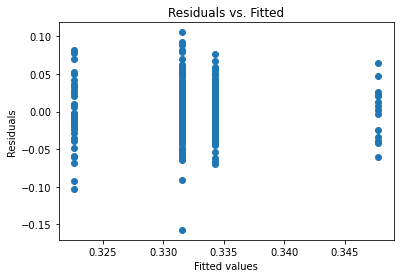

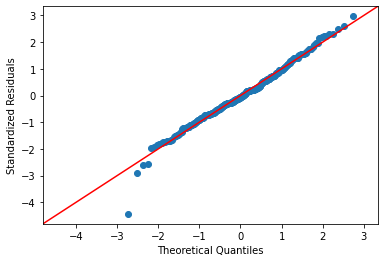

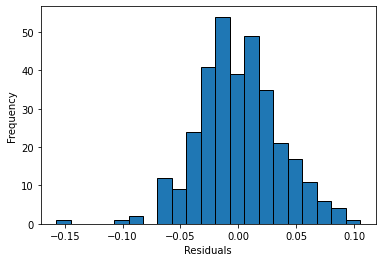

In [25]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt


plt.scatter(res.anova_model_out.fittedvalues, res.anova_model_out.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

Given that the p-value is higher than 0.05, there is not enough evidence to consider that at least two means are different. The graphical representation of the residuals does not show lack of homoscedasticity (graph 1) and in the qqplot the residuals are distributed very close to the normal line (graph 2 and 3).

### **Exercise 2**

#### T-TEST INDEPENDENT

A professor gives online lectures. Later, he uploads recorded lectures to the cloud for students who followed the course asynchronously (those who did not attend the lesson but later watched the records). However, he believes that the students who attend class at the class time and participate in the process are more successful. Therefore, he recorded the average grades of the students at the end of the semester. The data is below.

```py
synchronous = [94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6]


asynchronous = [77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2]
```

Conduct the hypothesis testing to check whether the professor’s belief is statistically significant by using a 0.05 significance level to evaluate the null and alternative hypotheses. Before doing hypothesis testing, check the related assumptions. Comment on the results.

**1. Defining Hypothesis**

H₀: μₛ≤μₐ

H₁: μₛ>μₐ

**2. Assumption Check**

H₀: The data is normally distributed.

H₁: The data is not normally distributed.

Assume that α=0.05. If the p-value is >0.05, it can be said that data is normally distributed.

In [26]:
# import libraries
from scipy.stats import ttest_ind
import numpy as np

In [46]:
#Data
synchronous = np.array([94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6])
print(synchronous)
asynchronous = np.array([77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2])
print(asynchronous)

[94.  84.9 82.6 69.5 80.1 79.6 81.4 77.8 81.7 78.8 73.2 87.9 87.9 93.5
 82.3 79.3 78.3 71.6 88.6 74.6 74.1 80.6]
[77.1 71.7 91.  72.2 74.8 85.1 67.6 69.9 75.3 71.7 65.7 72.6 71.5 78.2]


In [47]:
#Media y desviacion estandar
synchronous_mean = np.mean(synchronous)
synchronous_std = np.std(synchronous)
asynchronous_mean = np.mean(asynchronous)
asynchronous_std = np.std(asynchronous)
print('mean_1 :' + str(synchronous_mean))
print('std_1 : ' +str(synchronous_std))
print('mean_2 :' + str(asynchronous_mean))
print('std_2 :' + str(asynchronous_std))


mean_1 :81.01363636363634
std_1 : 6.383736114287583
mean_2 :74.60000000000001
std_2 :6.466617574678655


In [ ]:
#Defining Hypothesis
# Los estudiantes que participan sincronico son mas exitosos que los que asisten 
#asincronicamente
#H₀: μₛ≤μₐ
Ho : mean_1 < mean_2

#H₁: μₛ>μₐ
H1 : mean_1 > mean_2

In [48]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")    

In [49]:
check_normality(asynchronous)
check_normality(synchronous)

p value:0.0803
Fail to reject null hypothesis >> The data is normally distributed
p value:0.6556
Fail to reject null hypothesis >> The data is normally distributed


In [35]:
#define veriables
data, pval = ttest_ind(synchronous, asynchronous)
print('p-value', pval)
if pval < 0.05:
    print("rechazo la hipostesis nula")
else:
    print("acepto la hipotesis nula")

p-value 0.007535984340826129
rechazo la hipostesis nula


In [41]:
import numpy as np
from scipy import stats
import pandas as pd

H₀: The variances of the samples are the same.

H₁: The variances of the samples are different.

In [51]:
def check_variance_homogeneity(synchronous, asynchronous):
    test_stat_var, p_value_var= stats.levene(synchronous,asynchronous)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")


It tests the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity). Suppose the resulting p-value of Levene’s test is less than the significance level (typically 0.05). In that case, the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances.

In [52]:
#check_variance_homogeneity
check_variance_homogeneity(synchronous,asynchronous)


p value:0.8149
Fail to reject null hypothesis >> The variances of the samples are same.


Are assumptions satisfied?

In [ ]:
#perform the parametric version of the test for 2 groups and unpaired data.

#Con un nivel de significancia del 0.05 se observa un p-value de  0.007535984340826129, 
# se rechaza la hipotesis nula, y se acepta la hipotesis alternativa, lo que significa
#que ambas variables No son independientes, por lo tanto si se observa relacion 
# entre la asistencia a las clases y el nivel de calificacion obtenido por los estudiantes

p-value 0.007535984340826129
rechazo la hipostesis nula



Macke a conclusion